In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import plotly.offline as pyo
import plotly.graph_objects as go
import yfinance as yf

from pandas_datareader import data as pdf
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [13]:
stocklist = ['^CNXPHARMA', 'SUNPHARMA.NS', 'LUPIN.NS', 'DRREDDY.NS', 'CIPLA.NS']
stocklist

['^CNXPHARMA', 'SUNPHARMA.NS', 'LUPIN.NS', 'DRREDDY.NS', 'CIPLA.NS']

In [46]:
df = yf.download(['^CNXPHARMA', 'SUNPHARMA.NS', 'LUPIN.NS', 'DRREDDY.NS'], start='2015-01-01', end='2025-12-31')
df

[*********************100%***********************]  4 of 4 completed


Price             Close                                                 High  \
Ticker       DRREDDY.NS     LUPIN.NS SUNPHARMA.NS    ^CNXPHARMA   DRREDDY.NS   
Date                                                                           
2015-01-01   597.171448  1344.990601   757.830383  10923.250000   601.728611   
2015-01-02   599.199097  1347.907959   761.563354  10955.599609   603.151720   
2015-01-05   585.620544  1346.025879   762.024170  10920.599609   599.198999   
2015-01-06   570.210022  1313.605713   745.248962  10637.799805   582.198108   
2015-01-07   565.308716  1296.431152   746.401184  10604.950195   572.535001   
...                 ...          ...          ...           ...          ...   
2025-12-24  1265.800049  2107.000000  1737.000000  22757.400391  1285.099976   
2025-12-25  1265.800049  2107.000000  1737.000000           NaN  1265.800049   
2025-12-26  1269.300049  2112.399902  1719.500000  22684.650391  1275.000000   
2025-12-29  1268.599976  2082.100098  1717.199951  22578.300781  1275.900024   
2025-12-30  1265.800049  2080.399902  1720.199951  22540.050781  1272.900024   

Price                                                       Low               \
Ticker         LUPIN.NS SUNPHARMA.NS    ^CNXPHARMA   DRREDDY.NS     LUPIN.NS   
Date                                                                           
2015-01-01  1351.201816   765.019714  10983.750000   595.962422  1340.191119   
2015-01-02  1357.506922   765.480624  11005.099609   598.008632  1343.908372   
2015-01-05  1356.707107   765.664938  10982.000000   584.244120  1341.273382   
2015-01-06  1344.755419   760.042404  10876.099609   568.247675  1304.618473   
2015-01-07  1319.017061   751.378444  10672.950195   559.877323  1284.902928   
...                 ...          ...           ...          ...          ...   
2025-12-24  2115.000000  1759.000000  22934.300781  1252.400024  2096.199951   
2025-12-25  2107.000000  1737.000000           NaN  1265.800049  2107.000000   
2025-12-26  2117.000000  1737.000000  22807.900391  1261.099976  2095.699951   
2025-12-29  2114.000000  1727.500000  22721.250000  1260.000000  2078.100098   
2025-12-30  2098.800049  1723.099976  22615.949219  1256.400024  2065.100098   

Price                                         Open                            \
Ticker     SUNPHARMA.NS    ^CNXPHARMA   DRREDDY.NS     LUPIN.NS SUNPHARMA.NS   
Date                                                                           
2015-01-01   754.051337  10911.450195   600.798583  1344.237806   761.793727   
2015-01-02   759.489506  10948.799805   598.938661  1350.448827   759.489506   
2015-01-05   759.904247  10902.750000   599.198999  1349.649012   761.425036   
2015-01-06   740.778689  10614.650391   582.198108  1341.038202   758.567689   
2015-01-07   737.368432  10525.650391   571.986316  1313.605854   745.755975   
...                 ...           ...          ...          ...          ...   
2025-12-24  1719.000000  22717.449219  1281.099976  2110.000000  1755.900024   
2025-12-25  1737.000000           NaN  1265.800049  2107.000000  1737.000000   
2025-12-26  1708.000000  22631.599609  1265.000000  2107.199951  1737.000000   
2025-12-29  1710.300049  22552.599609  1269.300049  2112.399902  1719.500000   
2025-12-30  1707.000000  22395.150391  1268.000000  2091.699951  1723.099976   

Price                        Volume                                    
Ticker        ^CNXPHARMA DRREDDY.NS LUPIN.NS SUNPHARMA.NS  ^CNXPHARMA  
Date                                                                   
2015-01-01  10957.099609     378210   119605       587479   2363000.0  
2015-01-02  10952.950195     430070   247162       710310   2938000.0  
2015-01-05  10955.900391    1468825   211101       792287   4063000.0  
2015-01-06  10873.900391    1956675   405597      1709888   6106000.0  
2015-01-07  10655.750000    1597185   483850      1730518   4858000.0  
...                  ...        ...      ...          ...    

In [48]:
Close = df.Close
Close.head()

Ticker      DRREDDY.NS     LUPIN.NS  SUNPHARMA.NS    ^CNXPHARMA
Date                                                           
2015-01-01  597.171448  1344.990601    757.830383  10923.250000
2015-01-02  599.199097  1347.907959    761.563354  10955.599609
2015-01-05  585.620544  1346.025879    762.024170  10920.599609
2015-01-06  570.210022  1313.605713    745.248962  10637.799805
2015-01-07  565.308716  1296.431152    746.401184  10604.950195

# Calculate Log Normal Returns
I usually preferred log normal returns over simple return. Because Log Normal returns givs the exact percentage change.

In [50]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns

Ticker      DRREDDY.NS  LUPIN.NS  SUNPHARMA.NS  ^CNXPHARMA
Date                                                      
2015-01-02    0.003390  0.002167      0.004914    0.002957
2015-01-05   -0.022922 -0.001397      0.000605   -0.003200
2015-01-06   -0.026667 -0.024381     -0.022260   -0.026237
2015-01-07   -0.008633 -0.013161      0.001545   -0.003093
2015-01-08    0.008877  0.021792      0.011052    0.012431
...                ...       ...           ...         ...
2025-12-22    0.004060  0.000235      0.014169    0.007734
2025-12-23    0.000078 -0.006038     -0.007885   -0.002306
2025-12-24   -0.013886 -0.003080     -0.010822   -0.005159
2025-12-29   -0.000552 -0.014448     -0.001339   -0.004699
2025-12-30   -0.002210 -0.000817      0.001746   -0.001696

[2706 rows x 4 columns]

# Calculating Standard Deviation
Here I'm calculating the standard deviation  to get a brief understanding of volatility of daily returns

In [52]:
daily_std = log_returns.std()
daily_std

Ticker
DRREDDY.NS      0.016654
LUPIN.NS        0.018791
SUNPHARMA.NS    0.018050
^CNXPHARMA      0.012292
dtype: float64

In [54]:
annualized_volatility = daily_std * np.sqrt(252)
annualized_volatility*100

Ticker
DRREDDY.NS      26.437748
LUPIN.NS        29.829270
SUNPHARMA.NS    28.652941
^CNXPHARMA      19.513540
dtype: float64

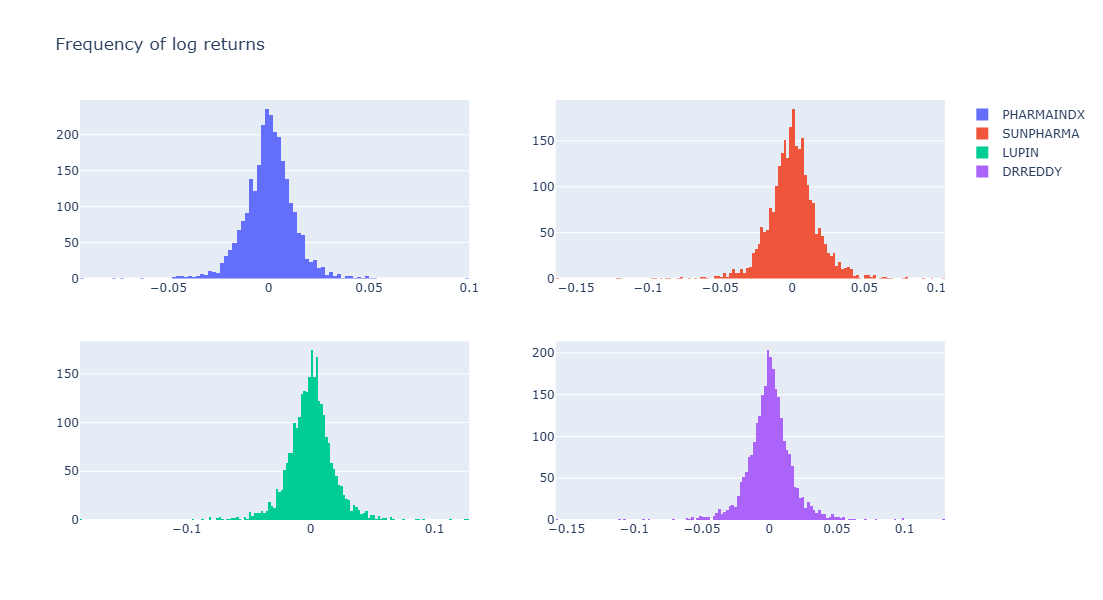

In [80]:
fig = make_subplots(rows=2, cols=2)

img0 = go.Histogram(x=log_returns['^CNXPHARMA'], name='PHARMAINDX')
img1 = go.Histogram(x=log_returns['SUNPHARMA.NS'], name='SUNPHARMA')
img2 = go.Histogram(x=log_returns['LUPIN.NS'], name='LUPIN')
img3 = go.Histogram(x=log_returns['DRREDDY.NS'], name='DRREDDY')

fig.append_trace(img0, 1, 1)  #This is in terms of rows and columns
fig.append_trace(img1, 1, 2)
fig.append_trace(img2, 2, 1)
fig.append_trace(img3, 2, 2)

fig.update_layout(autosize=False, width=1100, height=600, title='Frequency of log returns')

fig.show()

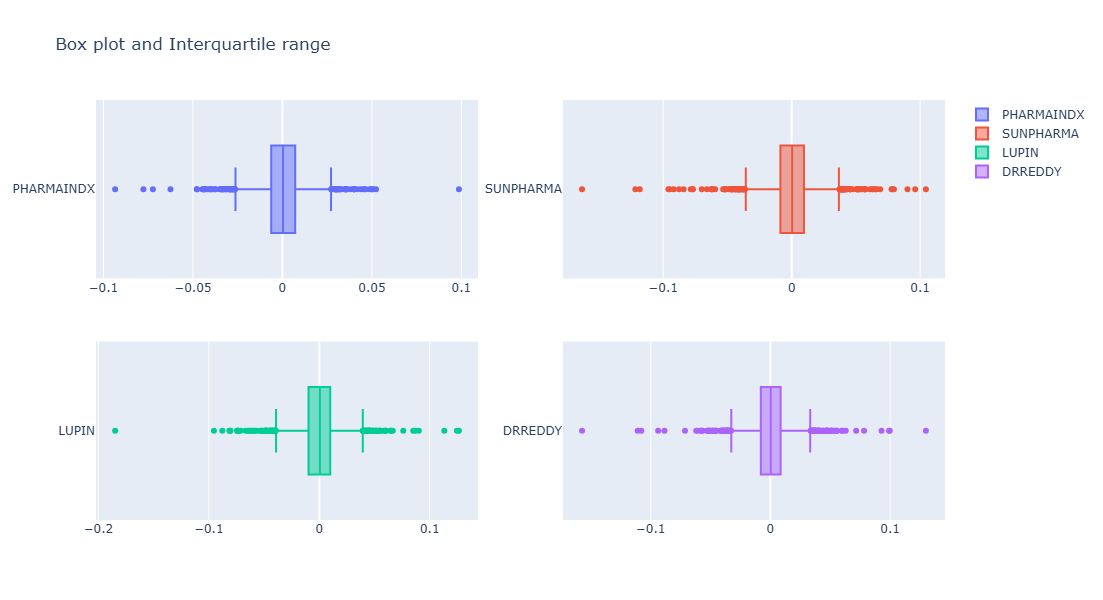

In [86]:
fig = make_subplots(rows=2, cols=2)

img0 = go.Box(x=log_returns['^CNXPHARMA'], name='PHARMAINDX')
img1 = go.Box(x=log_returns['SUNPHARMA.NS'], name='SUNPHARMA')
img2 = go.Box(x=log_returns['LUPIN.NS'], name='LUPIN')
img3 = go.Box(x=log_returns['DRREDDY.NS'], name='DRREDDY')

fig.append_trace(img0, 1, 1)  #This is in terms of rows and columns
fig.append_trace(img1, 1, 2)
fig.append_trace(img2, 2, 1)
fig.append_trace(img3, 2, 2)

fig.update_layout(autosize=False, width=1100, height=600, title='Box plot and Interquartile range')

fig.show()

# Calculating Standard Deviation

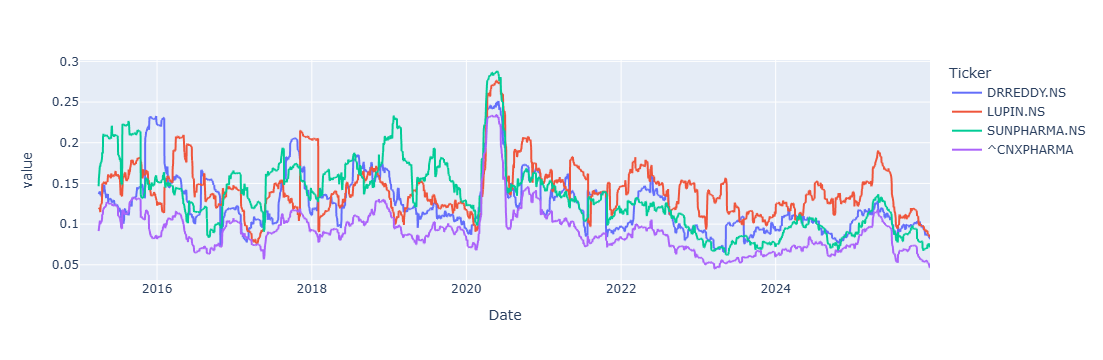

In [95]:
TRADING_DAYS = 60

volatility = log_returns.rolling(window=TRADING_DAYS).std() * np.sqrt(TRADING_DAYS)

volatility.plot()

# Calculating Sharpe ratio

Here we are calculating Sharpe Ratio = (Return-Risk free rate)/Standard deviation.
Since I wanted to knows how much risk adjusted return (return earned in excess of Rf) these Pharma stocks gives, I'll use sharpe ratio to get that.

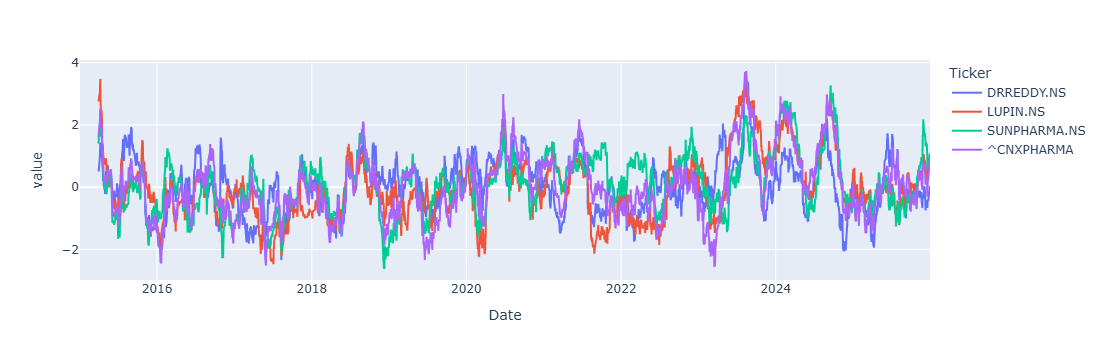

In [98]:
# Now here I'm taking Rf with reference to 10 year Indian Govt. Bond Yield and dividing it by 252 days (Total trading days in a year)
Rf = 0.06/252

sharpe_ratio = (log_returns.rolling(window=TRADING_DAYS).mean() - Rf) * TRADING_DAYS / volatility

sharpe_ratio.plot()

# Calculating Sortino Ratio

This will measure the downside side risk for a given stock.
Formula = (Return - Rf) / Standard deviation of downside volatility

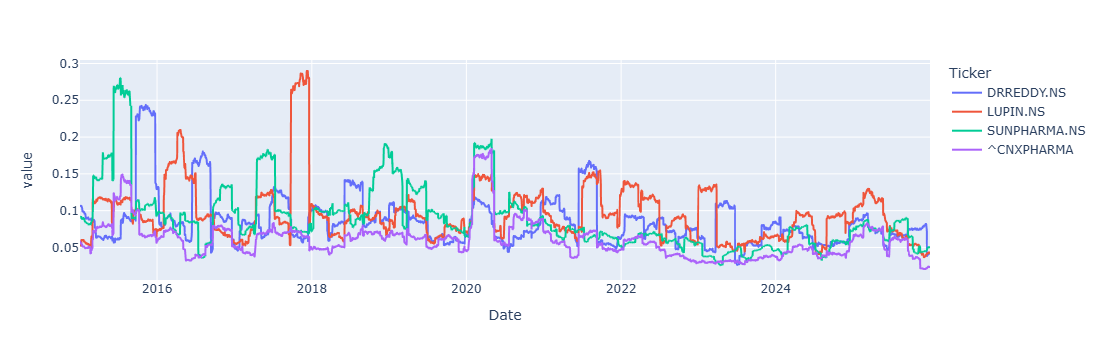

In [112]:
# Here I'm taking a downside risk which is less than 0 on any given day.

sortino_volatility = log_returns[log_returns<0].rolling(window=TRADING_DAYS, center=True, min_periods=10).std() * np.sqrt(TRADING_DAYS)

sortino_ratio = (log_returns.rolling(window=TRADING_DAYS).mean() - Rf) * TRADING_DAYS / sortino_volatility

sortino_volatility.plot()

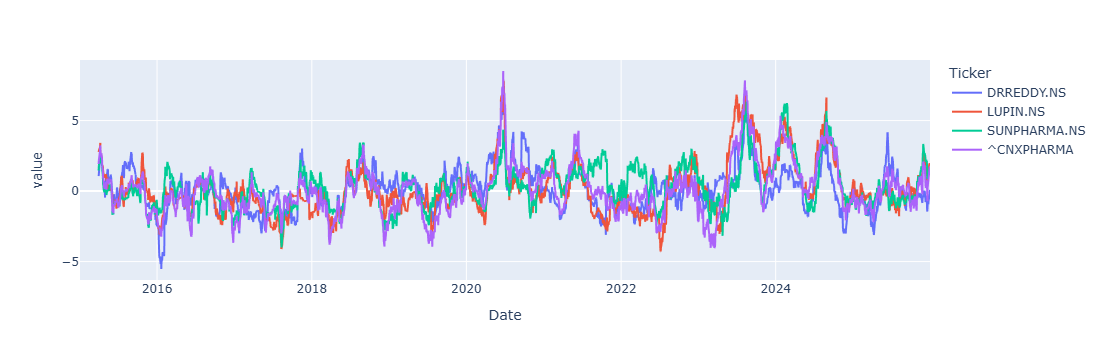

In [114]:
sortino_ratio.plot()